#### API's and Data Visualization

This week we introduced working with an API to access data, and some additional plotting functionality through the `seaborn` library.  In the assignment, you will extract data from an API and use `matplotlib` and `seaborn` to visualize the data.  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests

ModuleNotFoundError: No module named 'matplotlib'

**NOTE**: You will need to sign up for Alpha Vantage's API and receive a key.  Also, you will need to navigate the documentation for the specified time series or sentiment data.

**Problem 1**

Make sure to sign up for a new API Key from Alpha Vantage [here](https://www.alphavantage.co/).  Assign this key to the variable `api_key` below.

In [71]:
api_key = 'LW9XCI6UYMQY5E14'

**Problem 2**

Extract the `TIME_SERIES_DALY` for Tesla and GM for years 2019 - present.  Draw side by side line plots using `matplotlib`.  Add appropriate titles and labels, adjust the figure size to `(20, 5)`.  

In [72]:
base_url = 'https://www.alphavantage.co/query'
req = requests.get(
    base_url,
    params={
        "function": "TIME_SERIES_DAILY",
        "symbol": "TSLA",
        "apikey": api_key
    }
)

In [73]:
tsla = pd.DataFrame(req.json()['Time Series (Daily)']).T.astype('float')
tsla.index = pd.to_datetime(tsla.index)

In [74]:
req = requests.get(
    base_url,
    params={
        "function": "TIME_SERIES_DAILY",
        "symbol": "GM",
        "apikey": api_key
    }
)

In [75]:
gm = pd.DataFrame(req.json()['Time Series (Daily)']).T.astype('float')
gm.index = pd.to_datetime(gm.index)

In [76]:
gm.head()

,1. open,2. high,3. low,4. close,5. volume
2023-12-01,31.52,32.590,31.520,32.36,31661681.0
2023-11-30,31.75,32.270,31.580,31.60,45236466.0
2023-11-29,31.87,32.290,31.420,31.60,85193705.0
2023-11-28,28.44,28.995,28.330,28.89,18156722.0
2023-11-27,28.02,28.520,27.935,28.50,19878792.0


In [77]:
tsla.head()

,1. open,2. high,3. low,4. close,5. volume
2023-12-01,233.14,240.19,231.90,238.83,121331709.0
2023-11-30,245.14,245.22,236.91,240.08,132353196.0
2023-11-29,249.21,252.75,242.76,244.14,135401335.0
2023-11-28,236.68,247.00,234.01,246.72,148549913.0
2023-11-27,236.89,238.33,232.10,236.08,112031763.0


Text(0.5, 1.0, 'TESLA')

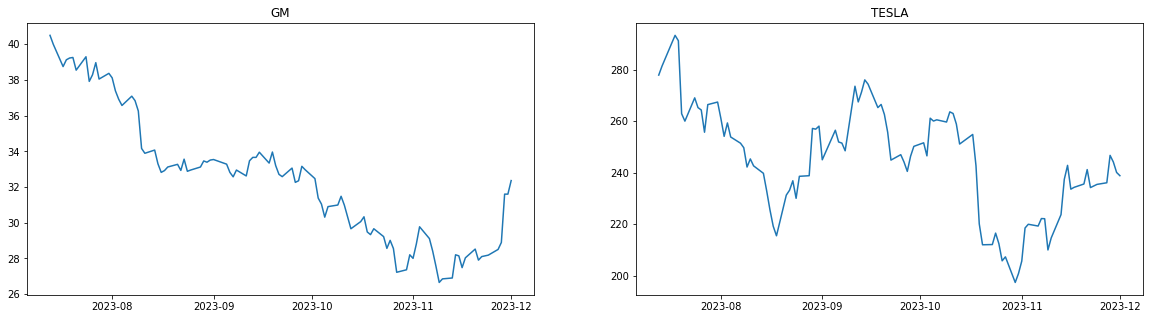

In [78]:
gms = gm['4. close']
ts = tsla['4. close']
fig, ax = plt.subplots(1, 2, figsize = (20, 5))
ax[0].plot(gms)
ax[1].plot(ts)
ax[0].set_title('GM')
ax[1].set_title('TESLA')

**Problem 3**

Extract the `TIME_SERIES_MONTHLY` for the Home Depot and Lowes.  Create a boxplot using `seaborn` where the $x$-axis is the month, and the $y$-axis is the Adjusted closing price of each stock respectively, and the plot splits the data by stock.  

In [79]:
base_url = 'https://www.alphavantage.co/query'
req = requests.get(
    base_url,
    params={
        "function": "TIME_SERIES_MONTHLY",
        "symbol": "HD",
        "apikey": api_key
    }
)

In [83]:
# req.json()

In [91]:
hd = pd.DataFrame(req.json()['Monthly Time Series']).T.astype('float')
hd.index = pd.to_datetime(hd.index)
hd['month'] = hd.index.month

In [90]:
base_url = 'https://www.alphavantage.co/query'
req = requests.get(
    base_url,
    params={
        "function": "TIME_SERIES_MONTHLY",
        "symbol": "LOW",
        "apikey": api_key
    }
)

lw = pd.DataFrame(req.json()['Monthly Time Series']).T.astype('float')
lw.index = pd.to_datetime(lw.index)
lw['month'] = lw.index.month

In [111]:
combined = pd.melt(combined, ignore_index=False)
combined.head()

,variable,value
2023-12-01,hd,203.92
2023-11-30,hd,198.83
2023-10-31,hd,190.57
2023-09-29,hd,207.84
2023-08-31,hd,230.48


In [115]:
combined['month'] = combined.index.month

<AxesSubplot: xlabel='month', ylabel='value'>

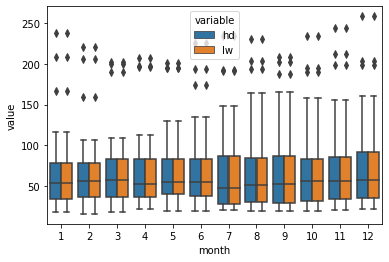

In [116]:
sns.boxplot(data = combined, x = 'month', y = 'value', hue = 'variable')

**Problem 4**

Extract the `NEWS_SENTIMENT` for 200 articles related to Tesla stock.  Create a histogram of the sentiment scores from each article.  This boils down to extracting the `overall_sentiment_score` from each entry and plotting the results!

In [121]:
#update the parameters
base_url = 'https://www.alphavantage.co/query'
req = requests.get(
    base_url,
    params={"function": "NEWS_SENTIMENT",
        "symbol": "TSLA",
        "apikey": api_key,
        "limit": 1000

    }
)
results = req.json()

In [124]:
sentiments = []
for i in range(200):
    sentiments.append(results['feed'][i]['overall_sentiment_score'])

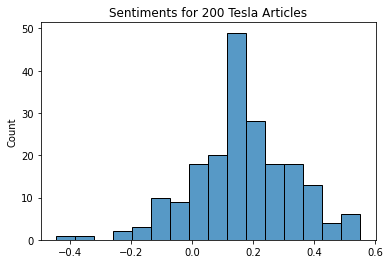

In [126]:
sns.histplot(sentiments)
plt.title('Sentiments for 200 Tesla Articles');

**Problem 5**

Extract data related to retail sales from the last decade.  Create a side by side line plot and a boxplot for each month.  

In [127]:
#update the parameters
base_url = 'https://www.alphavantage.co/query'
req = requests.get(
    base_url,
    params={"function": "RETAIL_SALES",
        "apikey": api_key

    }
)
results = req.json()

In [135]:
sales = pd.DataFrame(results['data'])
sales['date'] = pd.to_datetime(sales['date'])
sales.set_index('date', inplace = True)

In [136]:
sales['month'] = sales.index.month

In [139]:
sales['value'] = sales['value'].astype('float')

<AxesSubplot: xlabel='month', ylabel='value'>

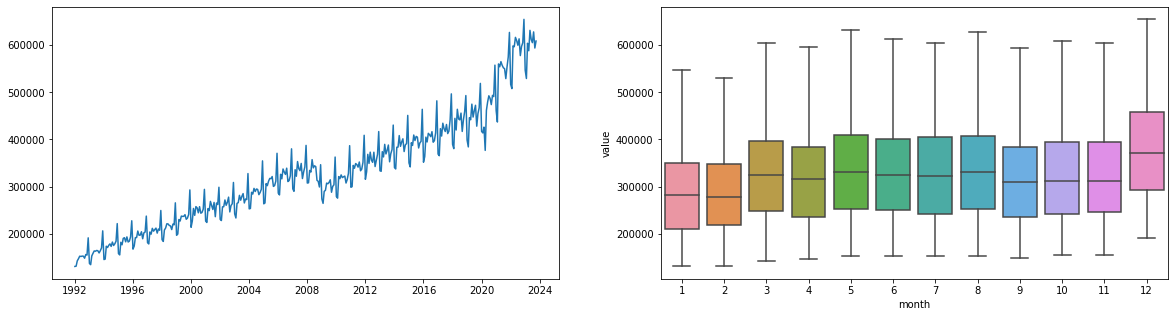

In [140]:
fig, ax = plt.subplots(1, 2, figsize = (20, 5))
ax[0].plot(sales['value'])
sns.boxplot(sales, x = 'month', y = 'value', ax = ax[1])

**Problem 6**

Extract `REAL_GDP_PER_CAPITA` and fix the data so as to have a datetime index sorted from earliest to latest date.  Create a line plot using seaborn with appropriate labels and titles.

In [141]:
#update the parameters
base_url = 'https://www.alphavantage.co/query'
req = requests.get(
    base_url,
    params={"function": "REAL_GDP_PER_CAPITA",
        
        "apikey": api_key,
       

    }
)
results = req.json()

In [145]:
gdp = pd.DataFrame(results['data'])
gdp['date'] = pd.to_datetime(gdp['date'])
gdp.set_index('date', inplace = True)

In [149]:
gdp = gdp.astype('float')

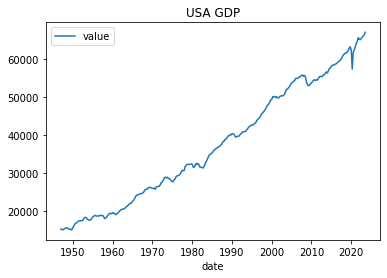

In [152]:
sns.lineplot(data = gdp)
plt.title('USA GDP');

**Problem 7**

Use the `pandas_datareader` to extract data from an endpoint of interest to you [docs](https://pandas-datareader.readthedocs.io/en/latest/). Create two visualizations using seaborn.

**Problem 8**

Using alpha vantage extract data for Apple and Microsoft using the [daily endpoint](https://www.alphavantage.co/documentation/#daily).  Create a scatterplot with a regression line [using seaborns regplot](http://seaborn.pydata.org/tutorial/regression.html) where Apple is on the horizontal axis and Microsoft is on the vertical.

In [153]:
base_url = 'https://www.alphavantage.co/query'
req = requests.get(
    base_url,
    params={
        "function": "TIME_SERIES_DAILY",
        "symbol": "AAPL",
        "apikey": api_key
    }
)

aapl = pd.DataFrame(req.json()['Time Series (Daily)']).T.astype('float')
aapl.index = pd.to_datetime(aapl.index)

In [154]:
base_url = 'https://www.alphavantage.co/query'
req = requests.get(
    base_url,
    params={
        "function": "TIME_SERIES_DAILY",
        "symbol": "MSFT",
        "apikey": api_key
    }
)

msft = pd.DataFrame(req.json()['Time Series (Daily)']).T.astype('float')
msft.index = pd.to_datetime(msft.index)

<AxesSubplot: xlabel='4. close', ylabel='4. close'>

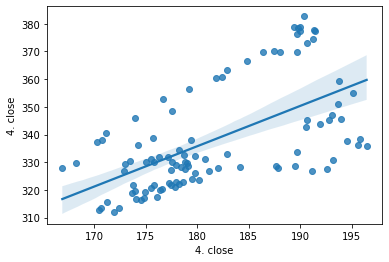

In [158]:
sns.regplot(y = msft['4. close'], x = aapl['4. close'])

**Problem 9**

Read through the documentation on the `resample` method in pandas [here](https://pandas.pydata.org/docs/user_guide/timeseries.html#resampling).  Use the resample method to extract the first adjusted closing price of the month for Apple stock since 2012.  

In [160]:
aapl.resample('M').first()['4. close']

2023-07-31    190.540
2023-08-31    195.605
2023-09-30    189.460
2023-10-31    173.750
2023-11-30    173.970
2023-12-31    191.240
Freq: M, Name: 4. close, dtype: float64

**Problem 10**

Read through the user guide on the `rolling` methods in pandas [here](https://pandas.pydata.org/docs/user_guide/window.html#rolling-window).  Use this to create side by side line plots of the Adjusted Closing price of NVIDIA stock since 2018 and the rolling 20 day mean for the Adjusted Closing price of NVIDIA.  What effect does the rolling mean have on the plot?

In [161]:
base_url = 'https://www.alphavantage.co/query'
req = requests.get(
    base_url,
    params={
        "function": "TIME_SERIES_DAILY",
        "symbol": "NVDA",
        "apikey": api_key
    }
)

nvda = pd.DataFrame(req.json()['Time Series (Daily)']).T.astype('float')
nvda.index = pd.to_datetime(nvda.index)

<AxesSubplot: >

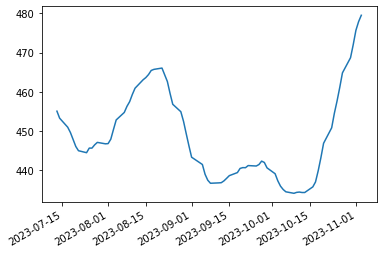

In [163]:
nvda.rolling(20)['4. close'].mean().plot()

**BONUS**

Using the [Dog API](https://dog.ceo/dog-api/), create a 2 X 5 grid of images of random dogs.  You will need to create subplots and you can use the axes `.imshow()` method.

In [179]:
#grid of dog pics is all they need!
ims = []
for i in range(10):
    r = requests.get('https://dog.ceo/api/breeds/image/random')
    ims.append(r.json()['message'])

In [180]:
ims

['https://images.dog.ceo/breeds/terrier-silky/n02097658_1137.jpg',
 'https://images.dog.ceo/breeds/hound-basset/n02088238_9486.jpg',
 'https://images.dog.ceo/breeds/komondor/n02105505_441.jpg',
 'https://images.dog.ceo/breeds/hound-blood/n02088466_6160.jpg',
 'https://images.dog.ceo/breeds/australian-kelpie/Resized_20201114_133404_109264920155921.jpg',
 'https://images.dog.ceo/breeds/retriever-golden/n02099601_10.jpg',
 'https://images.dog.ceo/breeds/dingo/n02115641_4262.jpg',
 'https://images.dog.ceo/breeds/frise-bichon/jh-ezio-1.jpg',
 'https://images.dog.ceo/breeds/corgi-cardigan/miss-muffin.jpg',
 'https://images.dog.ceo/breeds/airedale/n02096051_2946.jpg']

In [181]:
import PIL
import urllib

In [182]:
ims

['https://images.dog.ceo/breeds/terrier-silky/n02097658_1137.jpg',
 'https://images.dog.ceo/breeds/hound-basset/n02088238_9486.jpg',
 'https://images.dog.ceo/breeds/komondor/n02105505_441.jpg',
 'https://images.dog.ceo/breeds/hound-blood/n02088466_6160.jpg',
 'https://images.dog.ceo/breeds/australian-kelpie/Resized_20201114_133404_109264920155921.jpg',
 'https://images.dog.ceo/breeds/retriever-golden/n02099601_10.jpg',
 'https://images.dog.ceo/breeds/dingo/n02115641_4262.jpg',
 'https://images.dog.ceo/breeds/frise-bichon/jh-ezio-1.jpg',
 'https://images.dog.ceo/breeds/corgi-cardigan/miss-muffin.jpg',
 'https://images.dog.ceo/breeds/airedale/n02096051_2946.jpg']

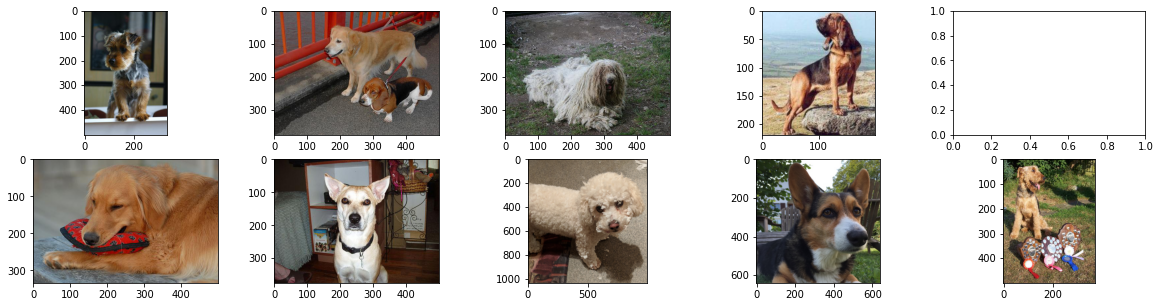

In [186]:
fig, ax = plt.subplots(2, 5, figsize = (20, 5))
n = 0
for i in range(2):
    for j in range(5):
        try:
            im = urllib.request.urlopen(ims[n])
            im = np.array(PIL.Image.open(im))
            ax[i, j].imshow(im)
        except:
            pass
        n += 1